In [ ]:
import pandas as pd
data=pd.read_csv("/content/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Checking for missing values
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Impute with the mean, median, or based on groups (e.g., median)
data['Age'] = data['Age'].fillna(data['Age'].median())

In [ ]:
df

In [ ]:
#Cabin column has too many missing values (almost 77%)
data.drop('Cabin', axis=1, inplace=True)

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Impute with the most frequent value (mode), as only 2 values are missing.
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
'''Some columns may not contribute much to predicting survival.
Dropping:
PassengerId: Just an identifier, not useful for prediction
Name: Could be dropped
Ticket: Likely uninformative unless you extract patterns'''

data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
#Encode Categorical Variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [ ]:
# Split Data into Features and Target
X = data.drop('Survived', axis=1)
y = data['Survived']

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Build and Train the Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.8100558659217877


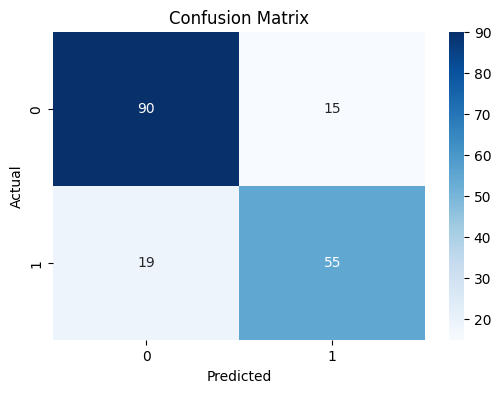

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the validation set
dt_y_pred = dt_model.predict(X_val)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_val, dt_y_pred))

Decision Tree Accuracy: 0.7877094972067039


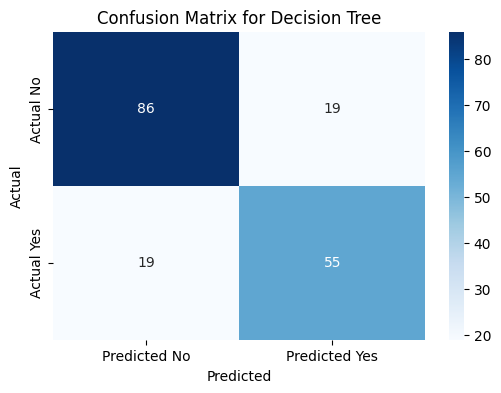

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_val, dt_y_pred)

# Plot Confusion Matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [ ]:
print("Depth of the Decision Tree:", dt_model.get_depth())

Depth of the Decision Tree: 21


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the validation set
rf_y_pred = rf_model.predict(X_val)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_val, rf_y_pred))

Random Forest Accuracy: 0.7988826815642458


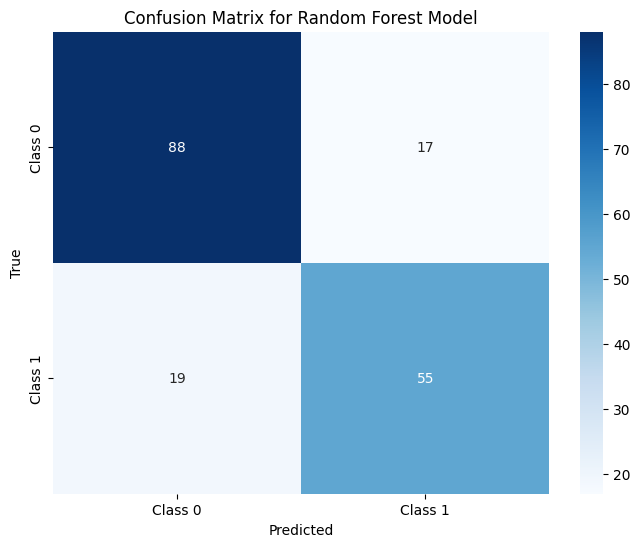

In [ ]:
cm = confusion_matrix(y_val, rf_y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load the Titanic dataset
# Assuming you've already preprocessed the data and have X_train and y_train

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display the features and their importance
feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_df)


      Feature  Importance
5        Fare    0.273568
1         Sex    0.268369
2         Age    0.253454
0      Pclass    0.080003
3       SibSp    0.054522
4       Parch    0.037680
7  Embarked_S    0.022740
6  Embarked_Q    0.009663


In [ ]:
# SVM Support Vector Machines
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize the model
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict on the validation set
svm_y_pred = svm_model.predict(X_val_scaled)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_val, svm_y_pred))

SVM Accuracy: 0.8212290502793296


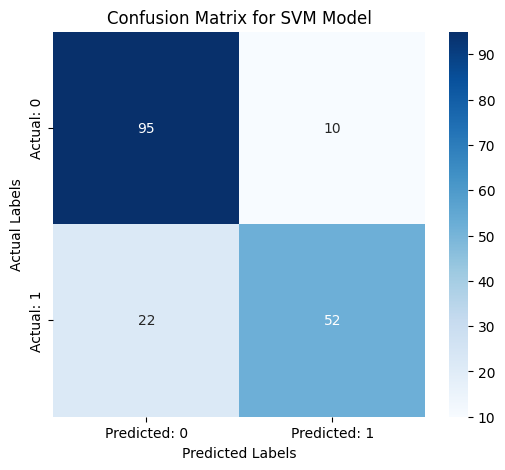

In [ ]:
cm = confusion_matrix(y_val, svm_y_pred)

# Visualizing the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [ ]:
import pandas as pd

single_input = pd.DataFrame({
    'Pclass': [3],              # Passenger class
    'Sex': ['male'],            # Gender
    'Age': [22.0],              # Age
    'SibSp': [1],               # Siblings/Spouses aboard
    'Parch': [0],               # Parents/Children aboard
    'Fare': [7.25],             # Fare paid
    'Embarked': ['S']           # Port of Embarkation
})

# Preprocess the input to match the training data
single_input['Sex'] = single_input['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex'
single_input = pd.get_dummies(single_input, columns=['Embarked'], drop_first=True)

# Ensure all expected columns are present
expected_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
for col in expected_columns:
    if col not in single_input.columns:
        single_input[col] = 0  # Add missing columns with 0

# Reorder columns to match the training data
single_input = single_input[expected_columns]

# Predict the outcome for the single input
single_prediction = model.predict(single_input)

# Print the prediction
print("Prediction for the single input:", single_prediction[0])


Prediction for the single input: 0
